In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [46]:
# 读入数据
df = pd.read_csv('datapreparation_000001.csv')
df.drop(df.columns[0],axis=1,inplace=True)
df.shape

(2366, 81)

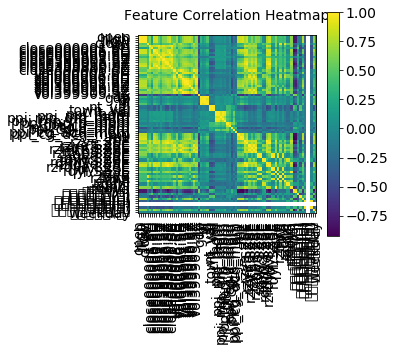

In [47]:
# 画图相关性
def show_heatmap(data):
    plt.matshow(data.corr())
    plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=90)
    plt.gca().xaxis.tick_bottom()
    plt.yticks(range(data.shape[1]), data.columns, fontsize=14)

    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title("Feature Correlation Heatmap", fontsize=14)
    
show_heatmap(df)


In [48]:
# 计算收盘价未来5天的平均价格
moving_5days_close=[]
for i in range(0,len(df)-5):
    avg=[df.iloc[i+1]['close'],df.iloc[i+2]['close'],df.iloc[i+3]['close'],df.iloc[i+4]['close'],df.iloc[i+5]['close']]
    moving_5days_close.append(np.mean(avg))
moving_5days_close=moving_5days_close+list(df['close'][-5:])  # 直接用收盘价来不足最后5天的移动平均价格
print(len(moving_5days_close))
df['moving_5days_close']=moving_5days_close
df.tail(10)


2366


,open,high,low,close,vol,close000001.SH,close000005.SH,close000006.SH,close000300.SH,close000905.SH,...,总资产周转率(次),每股净资产(元),每股未分配利润(元),每股经营现金流(元),毛利润(元),流动比率,经营现金流/营业收入,营业总收入(元),weekday,moving_5days_close
2356,16.20,16.92,16.15,16.56,1600062.32,3332.1832,3361.9387,6554.9162,4798.7361,6460.0408,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,3,17.518
2357,16.56,17.37,16.54,17.10,2095614.19,3336.3582,3373.1039,6577.7093,4791.6760,6428.6822,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,4,17.724
2358,17.30,18.10,17.30,17.48,2016105.52,3312.6671,3333.5554,6583.6002,4755.4879,6358.3213,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,0,17.768
2359,17.48,17.60,17.25,17.54,960071.95,3328.1029,3342.1894,6561.7791,4793.4672,6423.1128,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,1,17.812
2360,17.64,18.00,17.33,17.91,1244560.18,3325.0247,3338.1493,6575.9888,4792.8284,6350.0127,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,2,17.756
2361,17.94,18.50,17.30,17.56,1890519.05,3312.5005,3330.8673,6574.9237,4777.9845,6317.1438,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,3,17.560
2362,17.53,18.78,17.53,18.13,1698501.68,3277.9972,3277.7414,6604.0207,4718.4881,6213.2626,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,4,18.130
2363,18.20,18.29,17.45,17.70,1175598.65,3251.1188,3213.6547,6602.9634,4691.2359,6214.3779,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,0,17.700
2364,18.00,18.00,17.50,17.76,1034865.04,3254.3157,3229.3740,6513.7604,4699.2792,6221.3414,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,1,17.760
2365,17.76,17.90,17.29,17.63,1205823.86,3269.2380,3229.7425,6457.0549,4737.2718,6245.9986,...,0.03,14.88,6.7332,1.5819,0.0,0.0,0.26,1.166000e+11,2,17.630


In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(df)

In [43]:
# 设置参数
# train_split=int(0.8*df.shape[0])
# past=100
# future=5
# learning_rate=0.001
# batch_size=256
# epochs=100
# 定义正则化函数


In [44]:
# 将数据正则化
n = normalize(df.values,train_split)
df2 = pd.DataFrame(n)
df2.shape

C:\Users\ny7146\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\ny7146\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


(2366, 82)

In [45]:
# 划分训练测试集
train_data=df2.loc[0:train_split-1]
test_data=df2.loc[train_split:]
train_data.shape,test_data.shape

((1892, 82), (474, 82))

In [ ]:
start = past + future   # 100+5=105
end = start+ train_split # 100+ 1892 = 1992
x_train = train_data[[]]